<a href="https://colab.research.google.com/github/jordenpiu/IITI/blob/master/read_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/printsfinger" -d "/content/drive/My Drive/outputTestimg/"

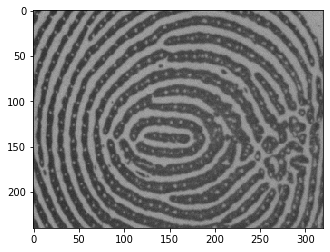

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load an color image in grayscale
img = cv2.imread('/content/drive/My Drive/outputTestimg/1.bmp')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [0]:
img1 = plt.imread('/content/drive/My Drive/outputTestimg/1.bmp')
print (img1)

[[136 132  95 ... 156 150 157]
 [130 115  76 ... 150 160 142]
 [124  88  74 ... 155 155 156]
 ...
 [ 58  62  62 ... 121  91  67]
 [ 77  61  63 ... 112  86  79]
 [ 88  67  61 ... 122  89  79]]


In [0]:
#properties of the image
print (type(img1))
print(img1.shape)
print(img1.ndim)
print(img1.size)
print(img1.dtype)
print(img1.nbytes)

<class 'numpy.ndarray'>
(240, 320)
2
76800
uint8
76800


In [0]:
#read 5 images together
all_img = [ ]
for i in range(1,5):
  r = plt.imread('/content/drive/My Drive/outputTestimg/{}.bmp'.format(i))
  all_img.append(r)
print(all_img)


[array([[136, 132,  95, ..., 156, 150, 157],
       [130, 115,  76, ..., 150, 160, 142],
       [124,  88,  74, ..., 155, 155, 156],
       ...,
       [ 58,  62,  62, ..., 121,  91,  67],
       [ 77,  61,  63, ..., 112,  86,  79],
       [ 88,  67,  61, ..., 122,  89,  79]], dtype=uint8), array([[148, 131,  93, ..., 102,  79,  71],
       [144, 133,  86, ..., 115,  97,  82],
       [143, 128,  89, ..., 133, 123,  88],
       ...,
       [ 72, 102, 134, ..., 123, 120, 121],
       [ 71,  87, 124, ..., 139, 126, 114],
       [ 67,  77, 117, ..., 152, 141, 120]], dtype=uint8), array([[42, 74, 95, ..., 91, 94, 88],
       [56, 89, 96, ..., 95, 91, 87],
       [66, 92, 97, ..., 90, 96, 82],
       ...,
       [91, 84, 73, ..., 34, 33, 34],
       [89, 92, 91, ..., 34, 37, 42],
       [93, 88, 95, ..., 35, 38, 43]], dtype=uint8), array([[ 82, 110, 149, ..., 116, 103,  88],
       [105, 151, 170, ..., 108,  97,  82],
       [139, 162, 175, ...,  97, 102,  86],
       ...,
       [ 69,  74, 

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [0]:
classifier =  Sequential()
classifier.add(Conv2D(32,3,3,input_shape = (240,340,3)))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dense(output_dim=1,activation = 'sigmoid'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(240, 340,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [0]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras.preprocessing .image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/training_data',target_size=(240,340),batch_size=32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/test_data',target_size=(240,340),batch_size=32,class_mode = 'binary')

Found 5 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [0]:
classifier.fit_generator(training_set,steps_per_epoch=100,epochs=1,validation_data = test_set,nb_val_samples = 5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=100, epochs=1, validation_data=<keras_pre..., validation_steps=5)`
  """Entry point for launching an IPython kernel.




Epoch 1/1





100/100 [==============================] - 192s 2s/step - loss: 0.0051 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000


In [0]:
import numpy as np
from keras.preprocessing import image
testimg = image.load_img('/content/drive/My Drive/4.bmp',target_size=(240,340))
testimg = image.img_to_array(testimg)
testimg = np.expand_dims(testimg,axis=0)
predict = classifier.predict(testimg)
print(predict)

[[0.]]
